# **🏆 The Stockbowl Championship: NVDA vs. AVGX 🏆**

After several rounds of intense analysis, we’ve reached the **grand finale** of the **Stockbowl**—where only one stock can emerge victorious. 

Both **NVDA** and **AVGX** have proven their strengths across multiple financial metrics, including **stability, trend consistency, liquidity, volatility, and market correlation (beta).** 

Now, it's time to crown the ultimate **Stockbowl Champion** by comparing their overall performance. 

Will **NVDA’s superior liquidity and trend stability** secure the win?  
Or will **AVGX’s lower market correlation** make it the smarter investment?  🚀🔥

In [1]:
# Import necessary libraries
import pandas as pd
import json

In [2]:
# Load the JSON file
with open("./Stock_data/all_stock_data.json", "r") as file:
    raw_data = json.load(file)

In [3]:
# Convert JSON to a Pandas DataFrame
df = pd.json_normalize(raw_data)

In [4]:
# Filter for AVGX and NRO
filtered_df = df[df["symbol"].isin(["NVDA", "AVGX"])]

In [5]:
# Rename columns to match the required format
filtered_df = filtered_df.rename(columns={
    "1. open": "Open",
    "2. high": "High",
    "3. low": "Low",
    "4. close": "Close",
    "5. volume": "Volume",
    "date": "Date",
    "symbol": "Symbol"
})

In [6]:
# Select only the relevant columns
filtered_df = filtered_df[["Open", "High", "Low", "Close", "Volume", "Date", "Symbol"]]

In [7]:
# Convert to JSON and save
output_file = "../Data/nvda_avgx_cleaned.json"
filtered_df.to_json(output_file, orient="records", indent=4)

In [8]:
# Define the file path to the JSON data
file_path = '../Data/nvda_avgx_cleaned.json'

In [9]:
# Open and load the JSON file into a Python dictionary
with open(file_path, 'r') as json_file:
    stock_data = json.load(json_file)  # Load JSON data

In [10]:
# Convert the JSON data into a Pandas DataFrame
nvda_avgx_df = pd.DataFrame(stock_data)

In [11]:
# Separate the data into two DataFrames: one for NVDA and one for DWTX
nvda_df = nvda_avgx_df[nvda_avgx_df['Symbol'] == 'NVDA'].copy()
avgx_df = nvda_avgx_df[nvda_avgx_df['Symbol'] == 'AVGX'].copy()

In [12]:
# Sort both DataFrames by date to ensure chronological order
nvda_df = nvda_df.sort_values(by='Date')
avgx_df = avgx_df.sort_values(by='Date')

In [13]:
# Display the first few rows of each DataFrame to verify the data separation
print("NVDA Data:")
print(nvda_df.head()) 

print("\nAVGX Data:")
print(avgx_df.head())

NVDA Data:
         Open     High      Low    Close   Volume        Date Symbol
6351  21.7500  24.3800  21.7500  23.5000  1630300  1999-11-01   NVDA
6350  23.9400  25.1300  23.7500  25.0000  1744800  1999-11-02   NVDA
6349  26.0000  28.1300  25.8100  27.4400  4191000  1999-11-03   NVDA
6348  27.7500  29.9400  27.7500  29.1900  2625700  1999-11-04   NVDA
6347  30.0000  30.2500  26.8800  28.2500  1284100  1999-11-05   NVDA

AVGX Data:
         Open     High      Low    Close Volume        Date Symbol
6462  21.2000  21.2000  19.1800  19.2300  22337  2024-08-22   AVGX
6461  19.6600  20.5400  19.3700  20.0393  36319  2024-08-23   AVGX
6460  19.9300  19.9300  18.2500  18.3776  59147  2024-08-26   AVGX
6459  18.0000  18.9400  17.7614  18.8300  19404  2024-08-27   AVGX
6458  18.8306  18.8306  17.7200  18.1013  29454  2024-08-28   AVGX


In [14]:
# Ensure 'Date' is in datetime format
nvda_df['Date'] = pd.to_datetime(nvda_df['Date'])
avgx_df['Date'] = pd.to_datetime(avgx_df['Date'])

In [15]:
# Set 'Date' as index only if it's not already
if 'Date' in nvda_df.columns:
    nvda_df.set_index('Date', inplace=True)
if 'Date' in avgx_df.columns:
    avgx_df.set_index('Date', inplace=True)

In [16]:
# Select only required columns (OHLC + Volume)
nvda_ohlc = nvda_df[['Open', 'High', 'Low', 'Close', 'Volume']]
avgx_ohlc = avgx_df[['Open', 'High', 'Low', 'Close', 'Volume']]

In [17]:
# Convert OHLC and Volume columns to numeric (float type)
nvda_ohlc = nvda_ohlc.astype({'Open': 'float', 'High': 'float',
                               'Low': 'float', 'Close': 'float',
                               'Volume': 'float'})

avgx_ohlc = avgx_ohlc.astype({'Open': 'float', 'High': 'float',
                               'Low': 'float', 'Close': 'float',
                               'Volume': 'float'})

In [18]:
# Display data types to verify
print(nvda_ohlc.dtypes)
print(avgx_ohlc.dtypes)

Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object


In [19]:
# Import necessary libraries
import mplfinance as mpf
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd

c:\Users\cindy\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


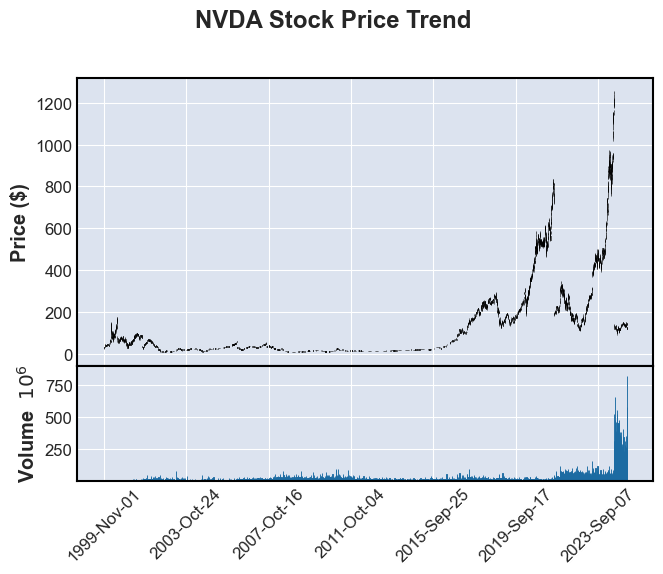

In [20]:
# Plot candlestick chart on a year level
mpf.plot(nvda_ohlc, type='candle', volume=True, title="NVDA Stock Price Trend", ylabel="Price ($)")
mpf.show()


In [21]:
# Generate separate candlestick plots for each quarter of NVDA
# Define custom market colors and chart style
mc = mpf.make_marketcolors(up='green', down='red', wick='black', edge='black', volume='blue')
s = mpf.make_mpf_style(base_mpl_style='classic', marketcolors=mc)

In [22]:
# Convert Date index to datetime format (if not already converted)
nvda_ohlc.index = pd.to_datetime(nvda_ohlc.index)

In [23]:
# Function to filter and plot data for each quarter
def plot_quarter(title, year, months, extra_year=None, extra_months=None):
    """
    Plots the candlestick chart for a given quarter.

    Parameters:
    - title: Title of the plot (e.g., "Q1 2024")
    - year: Year to filter data
    - months: List of months in the quarter
    - extra_year: Additional year if needed (e.g., extending Q4 into January)
    - extra_months: Extra months from the additional year
    """
    
    # Filter the data for the given year and months
    quarter_data = nvda_ohlc[(nvda_ohlc.index.year == year) & (nvda_ohlc.index.month.isin(months))]

    # If extra months from another year are needed (e.g., Q4 extending to January)
    if extra_year and extra_months:
        extra_data = nvda_ohlc[(nvda_ohlc.index.year == extra_year) & (nvda_ohlc.index.month.isin(extra_months))]
        quarter_data = pd.concat([quarter_data, extra_data]).sort_index()  # Merge and sort

    # If there is no data for the selected period, print a message and return
    if quarter_data.empty:
        print(f"No data for {title}")
        return

    # Plot candlestick chart for the selected quarter
    fig, ax = mpf.plot(quarter_data, type='candle', volume=True,
        title=f"NVDA Stock Price Trend ({title})",
        ylabel="Price ($)",
        xlabel="Date",
        style='yahoo',  # Fix: Use a valid mplfinance style
        mav=(10, 20, 50),  # Moving Averages (10-day, 20-day, 50-day)
        figsize=(10, 6),
        tight_layout=True,
        returnfig=True)

    # Rotate x-axis labels for better readability
    fig.autofmt_xdate()

    # Show the plot
    plt.show()

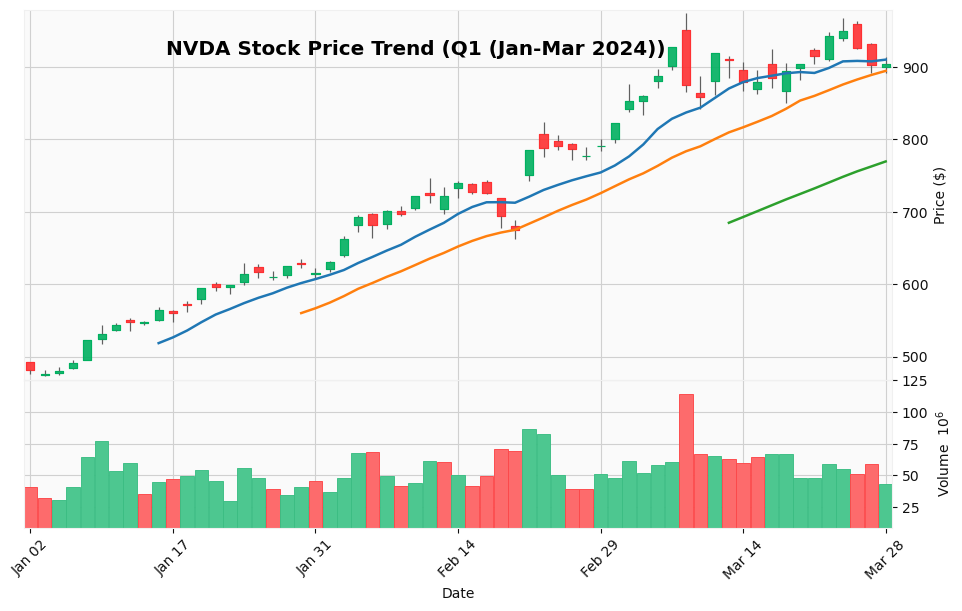

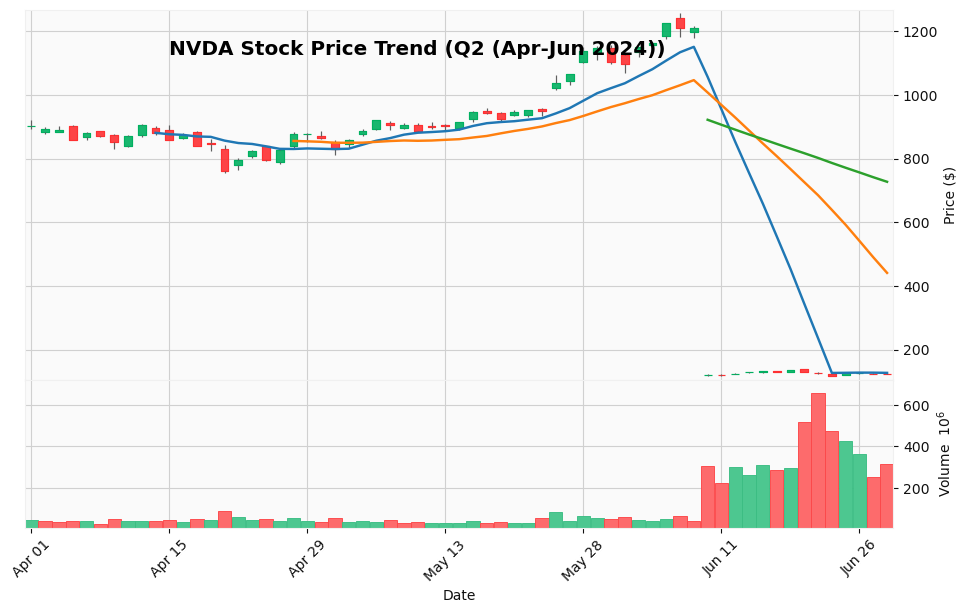

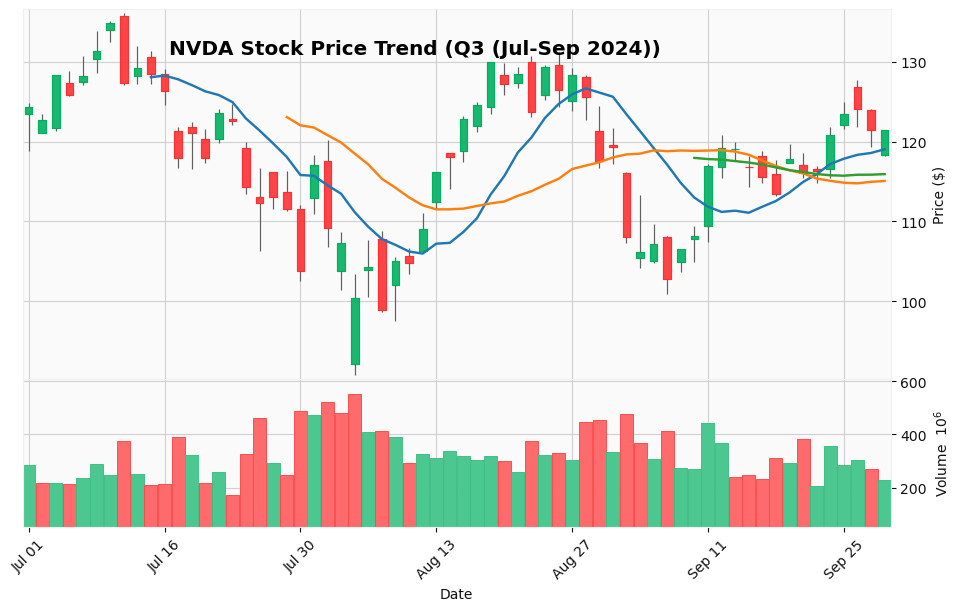

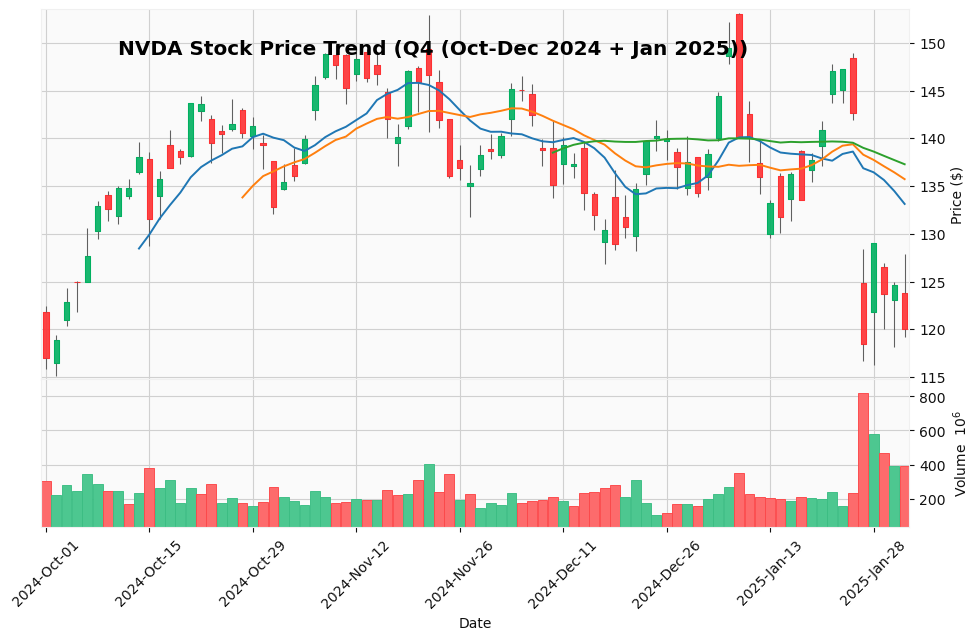

In [24]:
# Generate candlestick charts for each quarter of 2024
plot_quarter("Q1 (Jan-Mar 2024)", 2024, [1, 2, 3])    # First quarter
plot_quarter("Q2 (Apr-Jun 2024)", 2024, [4, 5, 6])    # Second quarter
plot_quarter("Q3 (Jul-Sep 2024)", 2024, [7, 8, 9])    # Third quarter
plot_quarter("Q4 (Oct-Dec 2024 + Jan 2025)", 2024, [10, 11, 12], extra_year=2025, extra_months=[1])  
# Fourth quarter extends to January 2025

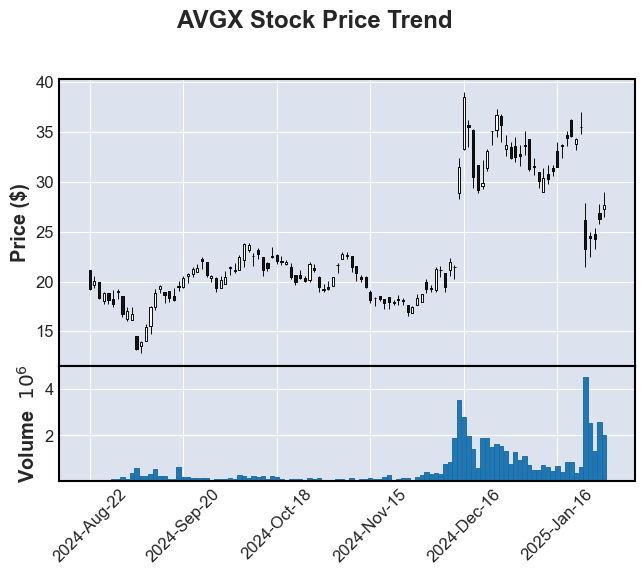

In [25]:
# Plot candlestick chart on a year level
mpf.plot(avgx_ohlc, type='candle', volume=True, title="AVGX Stock Price Trend", ylabel="Price ($)")
mpf.show()

In [26]:
# Generate separate candlestick plots for each quarter of AVGX
# Define custom market colors and chart style
mc = mpf.make_marketcolors(up='green', down='red', wick='black', edge='black', volume='blue')
s = mpf.make_mpf_style(base_mpl_style='classic', marketcolors=mc)

In [27]:
# Convert Date index to datetime format (if not already converted)
avgx_ohlc.index = pd.to_datetime(avgx_ohlc.index)

In [28]:
# Function to filter and plot data for each quarter
def plot_quarter(title, year, months, extra_year=None, extra_months=None):
    """
    Plots the candlestick chart for a given quarter.

    Parameters:
    - title: Title of the plot (e.g., "Q1 2024")
    - year: Year to filter data
    - months: List of months in the quarter
    - extra_year: Additional year if needed (e.g., extending Q4 into January)
    - extra_months: Extra months from the additional year
    """
    
    # Filter the data for the given year and months
    quarter_data = avgx_ohlc[(avgx_ohlc.index.year == year) & (avgx_ohlc.index.month.isin(months))]

    # If extra months from another year are needed (e.g., Q4 extending to January)
    if extra_year and extra_months:
        extra_data = avgx_ohlc[(avgx_ohlc.index.year == extra_year) & (avgx_ohlc.index.month.isin(extra_months))]
        quarter_data = pd.concat([quarter_data, extra_data]).sort_index()  # Merge and sort

    # If there is no data for the selected period, print a message and return
    if quarter_data.empty:
        print(f"No data for {title}")
        return

    # Plot candlestick chart for the selected quarter
    fig, ax = mpf.plot(quarter_data, type='candle', volume=True,
        title=f"AVGX Stock Price Trend ({title})",
        ylabel="Price ($)",
        xlabel="Date",
        style='yahoo',  # Fix: Use a valid mplfinance style
        mav=(10, 20, 50),  # Moving Averages (10-day, 20-day, 50-day)
        figsize=(10, 6),
        tight_layout=True,
        returnfig=True)

    # Rotate x-axis labels for better readability
    fig.autofmt_xdate()

    # Show the plot
    plt.show()

No data for Q1 (Jan-Mar 2024)
No data for Q2 (Apr-Jun 2024)


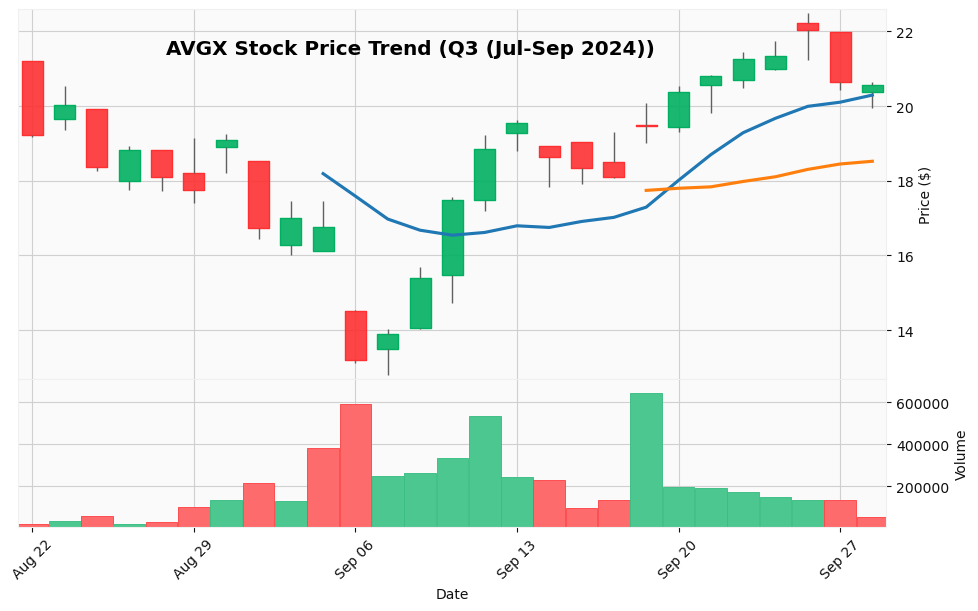

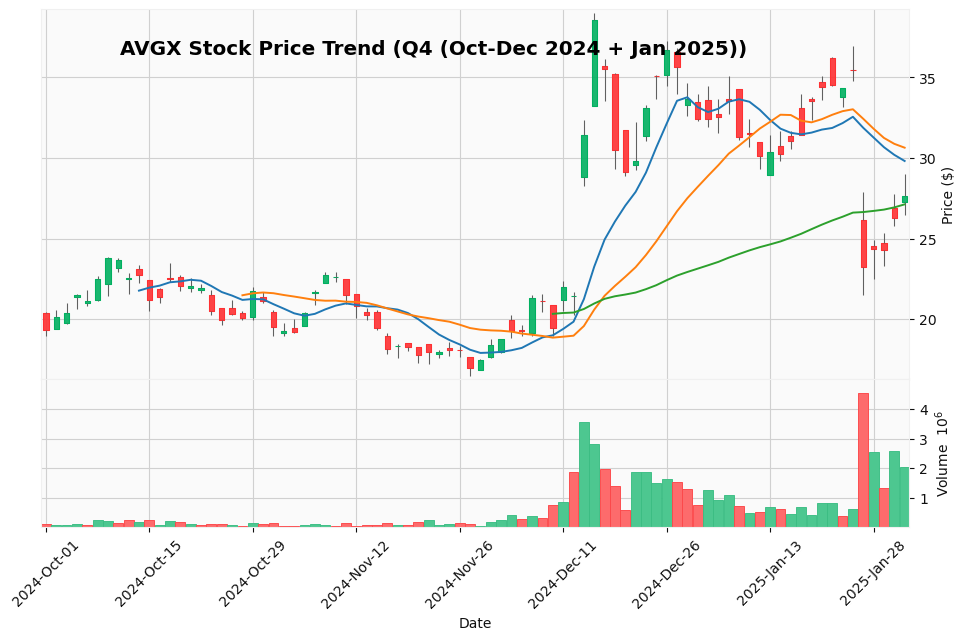

In [29]:
# Generate candlestick charts for each quarter of 2024
plot_quarter("Q1 (Jan-Mar 2024)", 2024, [1, 2, 3])    # First quarter
plot_quarter("Q2 (Apr-Jun 2024)", 2024, [4, 5, 6])    # Second quarter
plot_quarter("Q3 (Jul-Sep 2024)", 2024, [7, 8, 9])    # Third quarter
plot_quarter("Q4 (Oct-Dec 2024 + Jan 2025)", 2024, [10, 11, 12], extra_year=2025, extra_months=[1])  
# Fourth quarter extends to January 2025

# **Trend & Stability:**
- **NVDA** shows a more consistent price movement with gradual ups and downs, indicating stability.
- **AVGX** has more pronounced movements, especially with a strong uptrend in December before some volatility.

# **Liquidity (Volume):**
- **NVDA** has significantly higher trading volume, indicating better liquidity and ease of trading.
- **AVGX** has lower volume, which may lead to higher price slippage in trades.

# **Momentum & Moving Averages:**
- **NVDA** experienced a downward movement in January but showed prior stability.
- **AVGX** had a sharp upward breakout in December, with moving averages aligning positively.

# **Overall Winner:**
- **NVDA wins this round** based on liquidity and stability. While AVGX showed strong momentum in December, NVDA’s volume and trend consistency make it a more reliable option for trading and investment.

---

# **Volatility & Risk Analysis**

In [30]:
# Filter data to start from October 1, 2024 (adjust as needed)
start_date = "2024-10-01"
end_date = "2025-01-31"
nvda_filtered = nvda_ohlc.loc[start_date:].copy()
avgx_filtered = avgx_ohlc.loc[start_date:].copy()

In [31]:
# Compute daily returns
nvda_filtered['Daily Return'] = nvda_filtered['Close'].pct_change()
avgx_filtered['Daily Return'] = avgx_filtered['Close'].pct_change()

In [32]:
# Calculate standard deviation of returns (volatility)
nvda_volatility = nvda_filtered['Daily Return'].std()
avgx_volatility = avgx_filtered['Daily Return'].std()

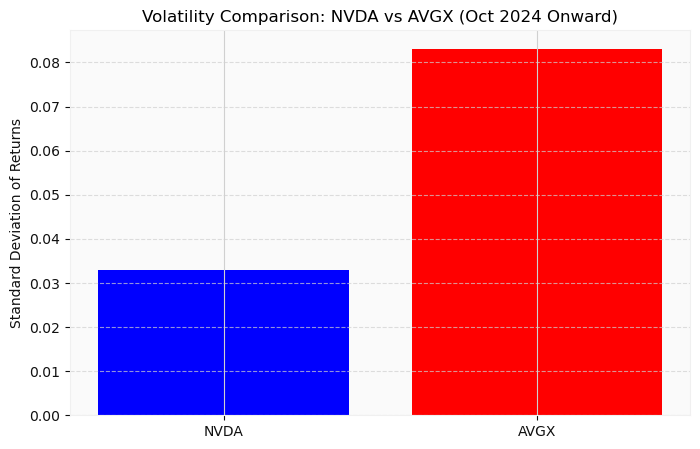

In [33]:
# Plot adjusted volatility comparison
plt.figure(figsize=(8, 5))
plt.bar(['NVDA', 'AVGX'], [nvda_volatility, avgx_volatility], color=['blue', 'red'])
plt.ylabel('Standard Deviation of Returns')
plt.title('Volatility Comparison: NVDA vs AVGX (Oct 2024 Onward)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [34]:
# Set the start date for filtering
start_date = "2024-10-01"
end_date = "2025-01-28"

# Filter data and create copies
nvda_filtered = nvda_ohlc.loc[start_date:].copy()
avgx_filtered = avgx_ohlc.loc[start_date:].copy()

In [35]:
# Compute daily returns
nvda_filtered['Daily Return'] = nvda_filtered['Close'].pct_change()
avgx_filtered['Daily Return'] = avgx_filtered['Close'].pct_change()

In [36]:
# Compute rolling standard deviation (volatility)
nvda_filtered['Rolling Volatility'] = nvda_filtered['Daily Return'].rolling(window=30).std()
avgx_filtered['Rolling Volatility'] = avgx_filtered['Daily Return'].rolling(window=30).std()

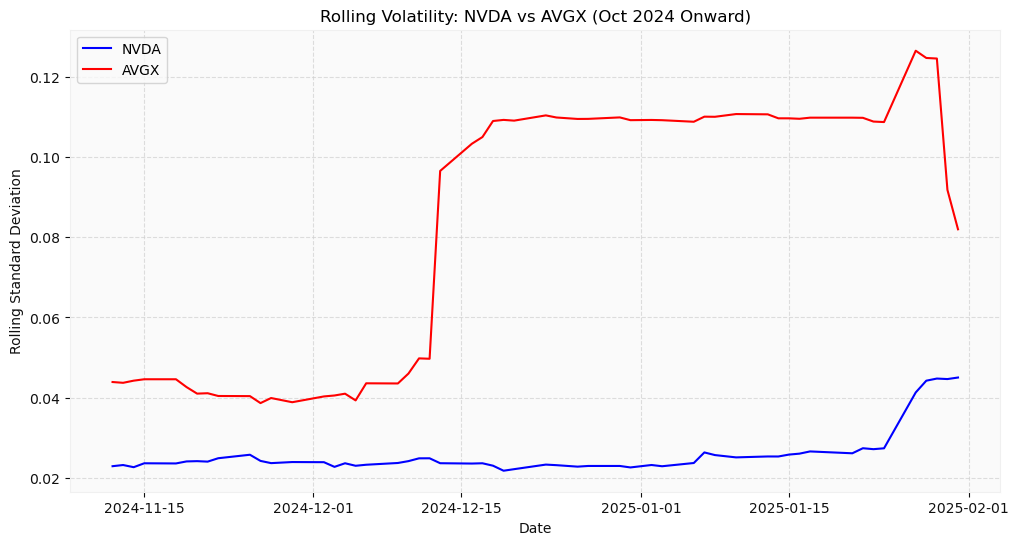

In [37]:
# Plot rolling volatility for both stocks
plt.figure(figsize=(12, 6))
plt.plot(nvda_filtered.index, nvda_filtered['Rolling Volatility'], label='NVDA', color='blue')
plt.plot(avgx_filtered.index, avgx_filtered['Rolling Volatility'], label='AVGX', color='red')

# Formatting the plot
plt.title('Rolling Volatility: NVDA vs AVGX (Oct 2024 Onward)')
plt.xlabel('Date')
plt.ylabel('Rolling Standard Deviation')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.show()

# **Winner Based on Volatility Analysis:**
For this round, we are comparing **NVDA vs. AVGX** using **volatility as the key metric**.

## **1. Standard Deviation of Returns (Volatility Bar Chart)**
- **NVDA** has a significantly lower standard deviation (~0.03-0.04), indicating more stable returns.
- **AVGX** has a much higher standard deviation (~0.08-0.09), suggesting greater price fluctuations.

## **2. Rolling Volatility (Trend Over Time)**
- **AVGX** experienced a massive volatility spike in mid-December, exceeding **0.12**, making it much more unstable.
- **NVDA** maintained relatively stable volatility throughout the period, with only slight increases in late January.

# **Final Verdict:**
✅ **NVDA wins this round** based on **lower volatility and better price stability**.  
AVGX's **higher volatility makes it riskier**, especially for investors seeking more predictable price movements.

---

# **Beta Market Correlation Analysis**

In [38]:
# Install Alpha Vantage
# if needed - %pip install alpha_vantage

In [39]:
# Import necessary libraries for fetching and processing market data
from alpha_vantage.timeseries import TimeSeries
import requests
import json
import pandas as pd

In [40]:
# Import the API key securely
# Sorry, I initially meant vantage.. 
from kirsten_api_keys import alpha_advantage_api

In [41]:
# Define the market index symbol (SPY)
symbol = "SPY"

In [42]:
# Construct the API request URL to fetch daily adjusted closing prices
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=SPY&outputsize=full&apikey=alpha_advantage_api'

In [43]:
# Send a GET request to the Alpha Vantage API to fetch market data
r = requests.get(url)

In [44]:
# Parse the JSON response from the API
data = r.json()

In [45]:
# Print a confirmation message along with the requested URL
print(f"Fetching data from URL: {url}")

Fetching data from URL: https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=SPY&outputsize=full&apikey=alpha_advantage_api


In [46]:
# Save the retrieved market index data to a JSON file for further analysis
with open('market_index_data.json', 'w') as json_file:
    json.dump(data, json_file, indent=4)

# Confirm that the market data has been successfully saved
print("Market index data saved to market_index_data.json")# Print the raw API response (JSON format) for verification
print(data)

Market index data saved to market_index_data.json
{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'SPY', '3. Last Refreshed': '2025-02-03', '4. Output Size': 'Full size', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2025-02-03': {'1. open': '592.6700', '2. high': '600.2900', '3. low': '590.4900', '4. close': '597.7700', '5. volume': '65857248'}, '2025-01-31': {'1. open': '607.5000', '2. high': '609.9600', '3. low': '601.0500', '4. close': '601.8200', '5. volume': '66671471'}, '2025-01-30': {'1. open': '603.9600', '2. high': '606.6000', '3. low': '600.7150', '4. close': '605.0400', '5. volume': '39281255'}, '2025-01-29': {'1. open': '603.7200', '2. high': '604.1300', '3. low': '599.2200', '4. close': '601.8100', '5. volume': '37177429'}, '2025-01-28': {'1. open': '600.6200', '2. high': '605.3700', '3. low': '597.2500', '4. close': '604.5200', '5. volume': '44433322'}, '2025-01-27': {'1. open': '594.8100', '2. high': '599.6900

In [47]:
# Define the file path for the market index JSON data
file_path = '../Data/market_index_data.json'

In [48]:
# Open and load the JSON data into a Python dictionary
with open(file_path, 'r') as json_file:
    market_data = json.load(json_file)

In [49]:
# Extract the "Time Series (Daily)" data and convert it into a Pandas DataFrame
market_index_df = pd.DataFrame.from_dict(market_data['Time Series (Daily)'], orient='index')

In [50]:
# Rename the column for closing price to "Market Close" and convert it to float
market_index_df = market_index_df.rename(columns={"4. close": "Market Close"}).astype(float)

In [51]:
# Rename all columns for better readability
market_index_df.rename(columns={
    "1. open": "Open",
    "2. high": "High",
    "3. low": "Low",
    "4. close": "Market Close",
    "5. volume": "Volume"
}, inplace=True)

In [52]:
# Convert the index (which contains dates as strings) into proper datetime format
market_index_df.index = pd.to_datetime(market_index_df.index)

In [53]:
# Reset the index so that dates become a separate column
market_index_df = market_index_df.reset_index()

# Rename the new date column for clarity
market_index_df.rename(columns={'index': 'Date'}, inplace=True)

# Display the DataFrame to check the result# Display the first few rows to verify the cleaned dataset

In [54]:
# Filter the dataset to include only records from August 23, 2024, onward
filtered_market_index_df = market_index_df[market_index_df['Date'] >= '2024-10-01']

In [55]:
# Display the filtered DataFrame
print(filtered_market_index_df)

         Date    Open      High      Low  Market Close      Volume
0  2025-01-31  607.50  609.9600  601.050        601.82  66671471.0
1  2025-01-30  603.96  606.6000  600.715        605.04  39281255.0
2  2025-01-29  603.72  604.1300  599.220        601.81  37177429.0
3  2025-01-28  600.62  605.3700  597.250        604.52  44433322.0
4  2025-01-27  594.81  599.6900  594.640        599.37  70361125.0
..        ...     ...       ...      ...           ...         ...
79 2024-10-07  571.30  571.9599  566.630        567.80  49964690.0
80 2024-10-04  572.35  573.3600  568.100        572.98  43005186.0
81 2024-10-03  567.36  569.8025  565.490        567.82  40846466.0
82 2024-10-02  567.71  569.9000  565.270        568.86  38097798.0
83 2024-10-01  573.40  574.0622  566.000        568.62  72668778.0

[84 rows x 6 columns]


In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [57]:
# Fetch NVDA data
nvda = yf.download("NVDA", start="2024-10-01")

# Fetch AVGX data
avgx = yf.download("AVGX", start="2024-10-01")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [58]:
# Calculate daily returns
nvda['Daily Return'] = nvda['Close'].pct_change()
avgx['Daily Return'] = avgx['Close'].pct_change()

In [59]:
print(nvda[['Close', 'Daily Return']].head())
print(avgx[['Close', 'Daily Return']].head())

Price            Close Daily Return
Ticker            NVDA             
Date                               
2024-10-01  116.991936          NaN
2024-10-02  118.841812     0.015812
2024-10-03  122.841537     0.033656
2024-10-04  124.911392     0.016850
2024-10-07  127.711205     0.022414
Price           Close Daily Return
Ticker           AVGX             
Date                              
2024-10-01  19.189463          NaN
2024-10-02  19.953470     0.039814
2024-10-03  20.251135     0.014918
2024-10-04  21.322727     0.052915
2024-10-07  20.945686    -0.017683


In [60]:
# Filter data between October 1, 2024, and January 29, 2025
filtered_market_index_df = market_index_df[
    (market_index_df['Date'] >= '2024-10-01') & 
    (market_index_df['Date'] <= '2025-01-29')
].copy()

In [61]:
# Convert 'Market Close' column to numeric format for calculations
filtered_market_index_df['Market Close'] = pd.to_numeric(
    filtered_market_index_df['Market Close'], errors='coerce'
)

In [62]:
# Calculate Market Return as the percentage change in 'Market Close'
filtered_market_index_df['Market Return'] = filtered_market_index_df['Market Close'].pct_change()

In [63]:
# Sort the DataFrame by Date in ascending order
filtered_market_index_df = filtered_market_index_df.sort_values(by='Date', ascending=True)

In [64]:
# Reset index to ensure proper alignment and display
filtered_market_index_df = filtered_market_index_df.reset_index(drop=True)

In [65]:
# Reorder columns so 'Date' is the first column
column_order = ['Date', 'Open', 'High', 'Low', 'Market Close', 'Volume', 'Market Return']
filtered_market_index_df = filtered_market_index_df[column_order]

In [66]:
# Assign a new numerical index for readability
filtered_market_index_df.index = range(1, len(filtered_market_index_df) + 1)

In [67]:
# Convert index to datetime format
filtered_market_index_df.index = pd.to_datetime(filtered_market_index_df.index)

In [68]:
filtered_market_index_df

,Date,Open,High,Low,Market Close,Volume,Market Return
1970-01-01 00:00:00.000000001,2024-10-01,573.40,574.0622,566.00,568.62,72668778.0,-0.000422
1970-01-01 00:00:00.000000002,2024-10-02,567.71,569.9000,565.27,568.86,38097798.0,0.001832
1970-01-01 00:00:00.000000003,2024-10-03,567.36,569.8025,565.49,567.82,40846466.0,-0.009006
1970-01-01 00:00:00.000000004,2024-10-04,572.35,573.3600,568.10,572.98,43005186.0,0.009123
1970-01-01 00:00:00.000000005,2024-10-07,571.30,571.9599,566.63,567.80,49964690.0,-0.009369
...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000000078,2025-01-23,605.80,609.7500,605.52,609.75,41152102.0,0.002928
1970-01-01 00:00:00.000000079,2025-01-24,609.81,610.7800,606.80,607.97,34604693.0,0.014348
1970-01-01 00:00:00.000000080,2025-01-27,594.81,599.6900,594.64,599.37,70361125.0,-0.008519
1970-01-01 00:00:00.000000081,2025-01-28,600.62,605.3700,597.25,604.52,44433322.0,0.004503


**NVDA DF CLEANING**

In [69]:
# Flatten the multi-index column names if necessary
nvda.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in nvda.columns]

In [70]:
# Drop unnecessary index columns if they exist
# columns_to_drop = ['level_0', 'index']
# nvda = nvda.drop(columns=[col for col in columns_to_drop if col in nvda.columns])

In [71]:
# Reset index to move Date into a regular column
nvda.reset_index(inplace=True)

In [72]:
# Convert index to datetime format
nvda.index = pd.to_datetime(nvda.index)

In [73]:
# Filter to only keep rows where Date is within the desired range
nvda = nvda[nvda['Date'] <= '2025-01-29']

In [74]:
nvda

,Date,Close_NVDA,High_NVDA,Low_NVDA,Open_NVDA,Volume_NVDA,Daily Return_
1970-01-01 00:00:00.000000000,2024-10-01,116.991936,122.431563,115.782020,121.761604,302094500,NaN
1970-01-01 00:00:00.000000001,2024-10-02,118.841812,119.371774,115.132069,116.431982,221845900,0.015812
1970-01-01 00:00:00.000000002,2024-10-03,122.841537,124.351436,120.331708,120.911670,277118000,0.033656
1970-01-01 00:00:00.000000003,2024-10-04,124.911392,125.031387,121.821609,124.931395,243678100,0.016850
1970-01-01 00:00:00.000000004,2024-10-07,127.711205,130.631002,124.941391,124.981389,346250200,0.022414
...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000000077,2025-01-23,147.220001,147.229996,143.720001,145.050003,155915500,0.001020
1970-01-01 00:00:00.000000078,2025-01-24,142.619995,148.970001,141.880005,148.369995,234657600,-0.031246
1970-01-01 00:00:00.000000079,2025-01-27,118.419998,128.399994,116.699997,124.800003,818830900,-0.169682
1970-01-01 00:00:00.000000080,2025-01-28,128.990005,129.000000,116.250000,121.809998,579666400,0.089259


In [75]:
print(nvda.columns)

Index(['Date', 'Close_NVDA', 'High_NVDA', 'Low_NVDA', 'Open_NVDA',
       'Volume_NVDA', 'Daily Return_'],
      dtype='object')


In [76]:
print(nvda.index.dtype)  
print(filtered_market_index_df.index.dtype)

datetime64[ns]
datetime64[ns]


In [77]:
# Merge AVGX with Market Index on Date
nvda_merged_data = pd.merge(
    nvda[['Date', 'Daily Return_']].copy(), 
    filtered_market_index_df[['Date', 'Market Return']].copy(),
    on='Date',
    how='inner'
)

In [78]:
# Rename columns for clarity
nvda_merged_data.rename(columns={'Daily Return': 'NVDA Daily Return'}, inplace=True)

In [79]:
# Display first few rows
print(nvda_merged_data.head())

        Date  Daily Return_  Market Return
0 2024-10-01            NaN      -0.000422
1 2024-10-02       0.015812       0.001832
2 2024-10-03       0.033656      -0.009006
3 2024-10-04       0.016850       0.009123
4 2024-10-07       0.022414      -0.009369


In [80]:
# Compute covariance matrix
cov_matrix = nvda_merged_data[['Daily Return_', 'Market Return']].cov()

# Extract covariance of AKRO vs. Market
cov_nvda_market = cov_matrix.iloc[0, 1]

# Extract variance of Market Returns
var_market = cov_matrix.iloc[1, 1]

# Calculate Beta
nvda_beta = cov_nvda_market / var_market

In [81]:
# Print Beta value
print(f"NVDA Beta: {nvda_beta:.3f}")

NVDA Beta: -0.178


In [82]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

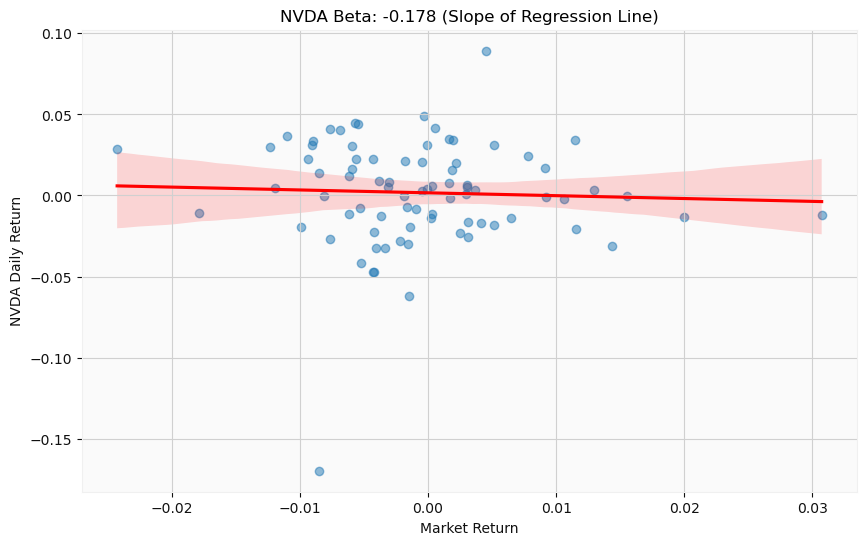

In [83]:
# Compute Beta
beta_value = nvda_merged_data[['Daily Return_', 'Market Return']].cov().iloc[0, 1] / nvda_merged_data['Market Return'].var()

# Plot again with annotation
plt.figure(figsize=(10, 6))
sns.regplot(x=nvda_merged_data['Market Return'], 
            y=nvda_merged_data['Daily Return_'], 
            scatter_kws={'alpha': 0.5}, 
            line_kws={'color': 'red'})

# Add labels and title
plt.xlabel('Market Return')
plt.ylabel('NVDA Daily Return')
plt.title(f'NVDA Beta: {beta_value:.3f} (Slope of Regression Line)')

# Show the plot
plt.show()

**AVGX DF Cleaning**

In [84]:
# Flatten the multi-index column names if necessary
avgx.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in avgx.columns]

In [85]:
# Drop unnecessary index columns if they exist
# columns_to_drop = ['level_0', 'index']
# avgx = avgx.drop(columns=[col for col in columns_to_drop if col in avgx.columns])

In [86]:
# Reset index to move Date into a regular column
avgx.reset_index(inplace=True)

In [87]:
# Convert index to datetime format
avgx.index = pd.to_datetime(avgx.index)

In [88]:
# Filter to only keep rows where Date is within the desired range
avgx = avgx[avgx['Date'] <= '2025-01-29']

In [89]:
avgx

,Date,Close_AVGX,High_AVGX,Low_AVGX,Open_AVGX,Volume_AVGX,Daily Return_
1970-01-01 00:00:00.000000000,2024-10-01,19.189463,20.276932,18.822342,20.221367,117500,NaN
1970-01-01 00:00:00.000000001,2024-10-02,19.953470,20.429734,19.219230,19.219230,107900,0.039814
1970-01-01 00:00:00.000000002,2024-10-03,20.251135,20.866310,19.566505,19.586350,97200,0.014918
1970-01-01 00:00:00.000000003,2024-10-04,21.322727,21.373331,20.499188,21.223505,136000,0.052915
1970-01-01 00:00:00.000000004,2024-10-07,20.945686,21.670004,20.672825,20.846464,107600,-0.017683
...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000000077,2025-01-23,34.320000,34.360001,33.160000,33.790001,394800,-0.006944
1970-01-01 00:00:00.000000078,2025-01-24,35.459999,36.959999,34.750000,35.490002,645500,0.033217
1970-01-01 00:00:00.000000079,2025-01-27,23.260000,27.889999,21.500000,26.129999,4540100,-0.344050
1970-01-01 00:00:00.000000080,2025-01-28,24.370001,24.943001,22.469999,24.570000,2533300,0.047721


In [90]:
print(avgx.columns)

Index(['Date', 'Close_AVGX', 'High_AVGX', 'Low_AVGX', 'Open_AVGX',
       'Volume_AVGX', 'Daily Return_'],
      dtype='object')


In [91]:
print(avgx.index.dtype)  
print(filtered_market_index_df.index.dtype)

datetime64[ns]
datetime64[ns]


In [92]:
# Merge AVGX with Market Index on Date
avgx_merged_data = pd.merge(
    avgx[['Date', 'Daily Return_']].copy(), 
    filtered_market_index_df[['Date', 'Market Return']].copy(),
    on='Date',
    how='inner'
)

In [93]:
# Rename columns for clarity
avgx_merged_data.rename(columns={'Daily Return': 'AVGX Daily Return'}, inplace=True)

In [94]:
# Display first few rows
print(avgx_merged_data.head())

        Date  Daily Return_  Market Return
0 2024-10-01            NaN      -0.000422
1 2024-10-02       0.039814       0.001832
2 2024-10-03       0.014918      -0.009006
3 2024-10-04       0.052915       0.009123
4 2024-10-07      -0.017683      -0.009369


In [95]:
# Compute covariance matrix
cov_matrix = avgx_merged_data[['Daily Return_', 'Market Return']].cov()

# Extract covariance of AKRO vs. Market
cov_avgx_market = cov_matrix.iloc[0, 1]

# Extract variance of Market Returns
var_market = cov_matrix.iloc[1, 1]

# Calculate Beta
avgx_beta = cov_avgx_market / var_market

In [96]:
# Print Beta value
print(f"AVGX Beta: {avgx_beta:.3f}")

AVGX Beta: -0.138


In [97]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

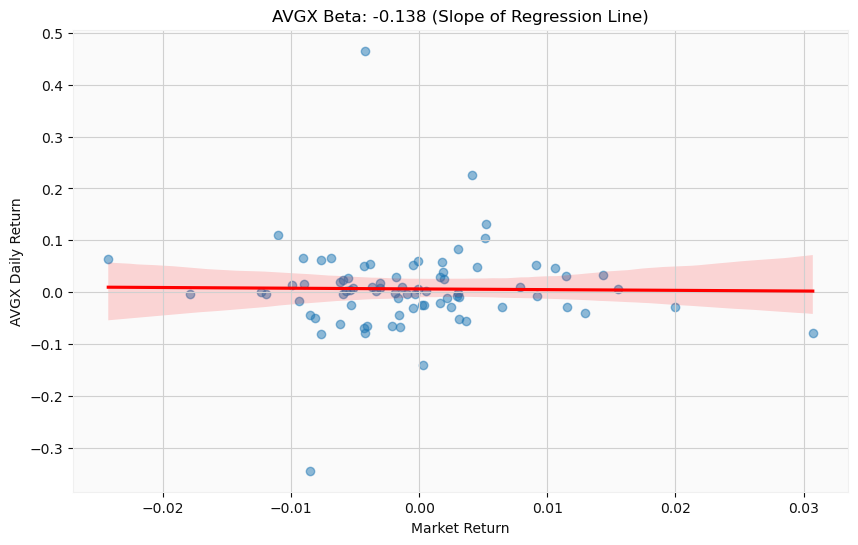

In [98]:
# Compute Beta
beta_value = avgx_merged_data[['Daily Return_', 'Market Return']].cov().iloc[0, 1] / avgx_merged_data['Market Return'].var()

# Plot again with annotation
plt.figure(figsize=(10, 6))
sns.regplot(x=avgx_merged_data['Market Return'], 
            y=avgx_merged_data['Daily Return_'], 
            scatter_kws={'alpha': 0.5}, 
            line_kws={'color': 'red'})

# Add labels and title
plt.xlabel('Market Return')
plt.ylabel('AVGX Daily Return')
plt.title(f'AVGX Beta: {beta_value:.3f} (Slope of Regression Line)')

# Show the plot
plt.show()

# **Winner Based on Beta (Market Correlation) Analysis**
The beta value represents a stock’s sensitivity to market movements.

## **1. NVDA Beta: -0.178**
- A negative beta suggests an inverse relationship with the market, meaning **NVDA tends to move opposite to the broader market.**
- The magnitude is small (-0.178), indicating **low sensitivity** to market fluctuations.

## **2. AVGX Beta: -0.138**
- Similar to NVDA, AVGX also has a **negative beta**, implying it moves **against** the market.
- The beta value is slightly closer to zero (-0.138), meaning **AVGX is even less reactive to market movements** than NVDA.

# **Final Verdict:**
✅ **AVGX wins this round** based on a **lower magnitude beta**, meaning it is slightly **less volatile relative to the market**, making it **less risky** in terms of market-driven movements.

NVDA still has a **low beta** but shows slightly more inverse movement compared to AVGX. If **lower market correlation is preferred, AVGX edges out NVDA** in this category.

---

# **Overall Winner: NVDA 🎉**

After evaluating **NVDA vs. AVGX** across key financial metrics, here’s the final verdict based on the **main decision factors**:

| **Metric**               | **NVDA** ✅ | **AVGX** ❌ | **Winner** 🏆 |
|-------------------------|------------|------------|--------------|
| **Stability**           | More stable price movement | More fluctuations and volatility | **NVDA** |
| **Trend Consistency**   | Maintained a steady trend | Sharp breakout but inconsistent | **NVDA** |
| **Liquidity**           | Higher trading volume | Lower liquidity, risk of slippage | **NVDA** |
| **Volatility**          | Lower standard deviation | High volatility, unstable | **NVDA** |
| **Rolling Volatility**  | Gradual increase | Huge spike in December, unstable | **NVDA** |
| **Market Correlation (Beta)** | Slightly more inverse to market (-0.178) | Less sensitive (-0.138) | **AVGX** |

### **Final Decision:**
✅ **NVDA wins the Stockbowl!**

AVGX only outperformed in **beta (market correlation)**, but this alone does not outweigh **NVDA's superior stability, trend consistency, liquidity, and controlled volatility**.  
